- Perform EDA and any data cleaning if necessary.
- Perform one hot encoding for categorical variables
- Visualize the histograms of numerical features. Do you observe skewness in the data? If yes apply the log transformation. Check the histograms again to see if data has been normalized.
- Apply Feature Scaling
- Choose only the numerical features for clustering
- Apply elbow method to find best number of clusters. Plot the graph.
- Choose optimum number of clusters and visualize it using PCA
- Implement KFOLD CV and use any classifier of your choosing and report the evaluation metrics

## Perform EDA and any data cleaning if necessary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
german_df = pd.read_csv("german_credit_data.csv") 

In [4]:
print(german_df.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [5]:
print(german_df.describe)

<bound method NDFrame.describe of      Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           45

In [6]:
print(german_df.info)

<bound method DataFrame.info of      Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576

In [7]:
german_df.nunique()


Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [8]:
german_df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
german_df["Saving accounts"].fillna("none", inplace=True)
german_df["Checking account"].fillna("none", inplace=True)
german_df.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [10]:
print (german_df.shape)

(1000, 10)


In [11]:
print(german_df.describe)

<bound method NDFrame.describe of      Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own            none           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little             none           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little             none           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little             none            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           45

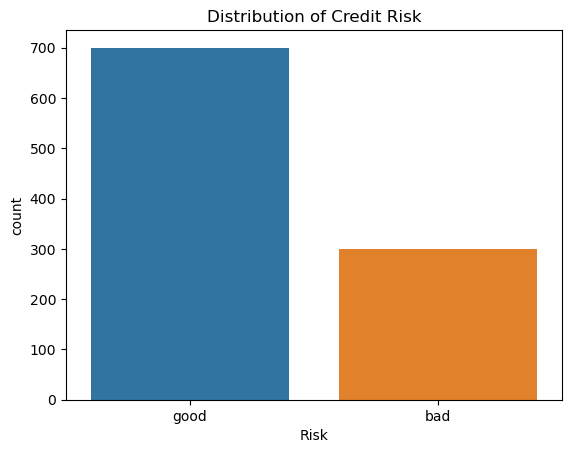

In [12]:
# Visualize the distribution of the target variable 'Risk'
sns.countplot(x='Risk', data=german_df)
plt.title('Distribution of Credit Risk')
plt.show()

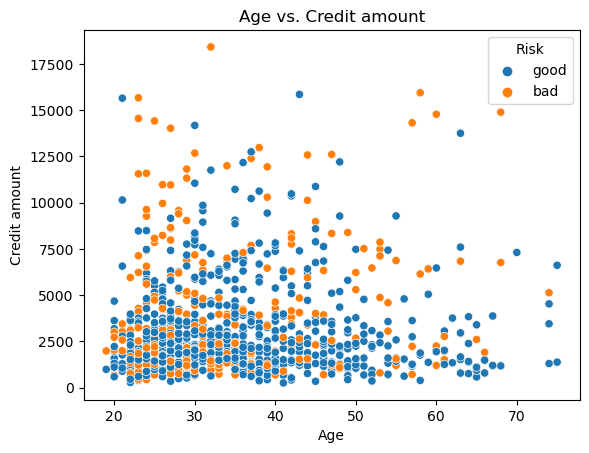

In [13]:
# Visualize the relationship between 'Age' and 'Credit amount'
sns.scatterplot(x='Age', y='Credit amount', hue='Risk', data=german_df)
plt.title('Age vs. Credit amount')
plt.show()

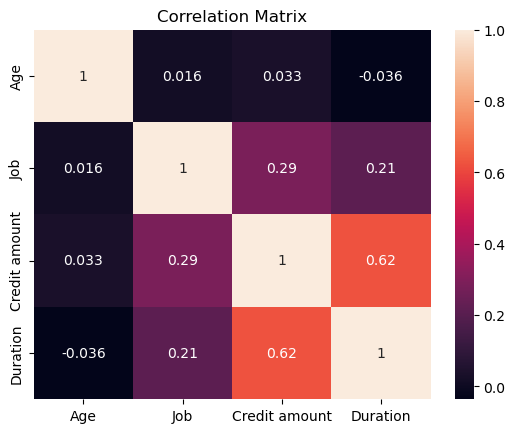

In [14]:
# Visualize the correlation matrix to check the relationships between numeric attributes
correlation_matrix = german_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

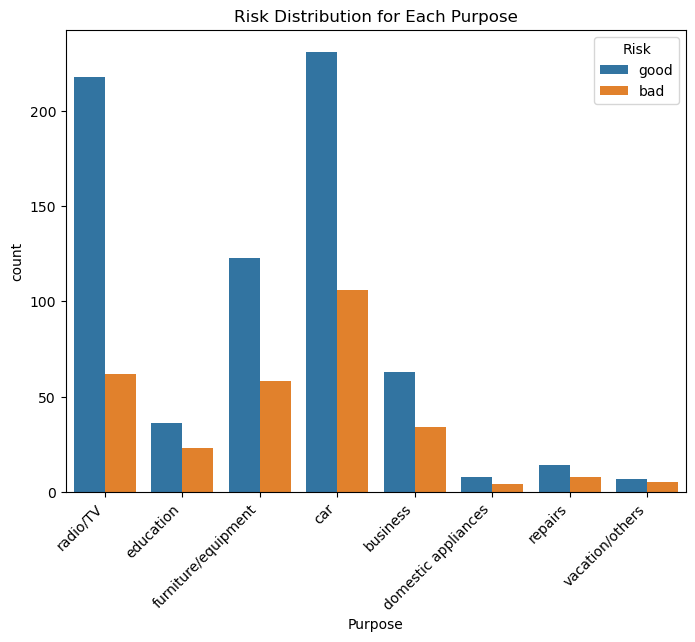

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Purpose', hue='Risk', data=german_df)
plt.xticks(rotation=45, ha='right')
plt.title('Risk Distribution for Each Purpose')
plt.show()

## Perform one hot encoding for categorical variables

In [16]:
df_encoded = pd.get_dummies(german_df, columns=['Sex', 'Housing', 'Purpose'])

In [17]:
(df_encoded.head())

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,none,little,1169,6,good,0,1,0,1,0,0,0,0,0,0,1,0,0
1,22,2,little,moderate,5951,48,bad,1,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,little,none,2096,12,good,0,1,0,1,0,0,0,0,1,0,0,0,0
3,45,2,little,little,7882,42,good,0,1,1,0,0,0,0,0,0,1,0,0,0
4,53,2,little,little,4870,24,bad,0,1,1,0,0,0,1,0,0,0,0,0,0


## Visualize the histograms of numerical features. Do you observe skewness in the data? If yes apply the log transformation. Check the histograms again to see if data has been normalized.

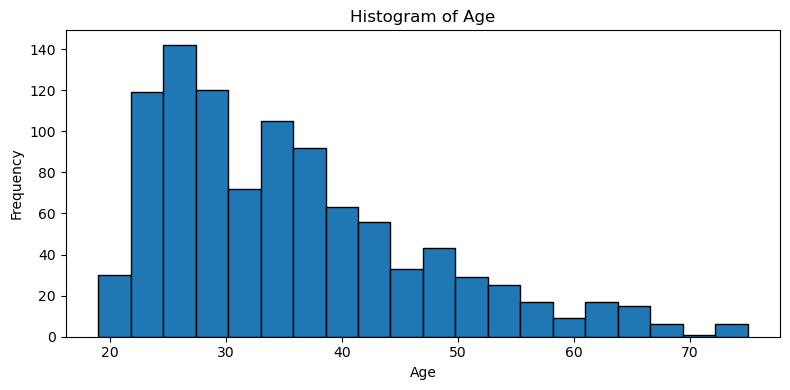

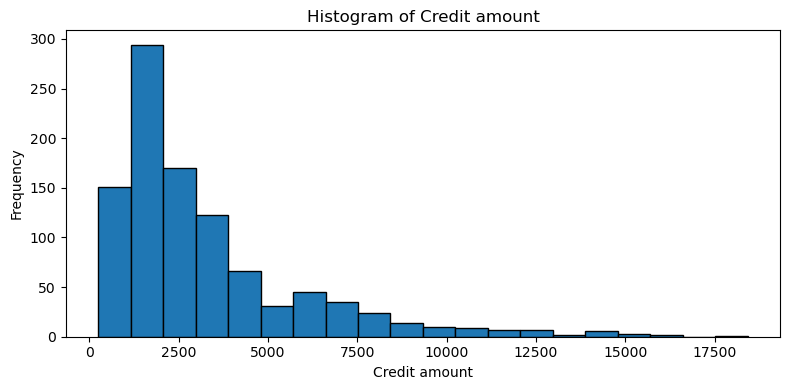

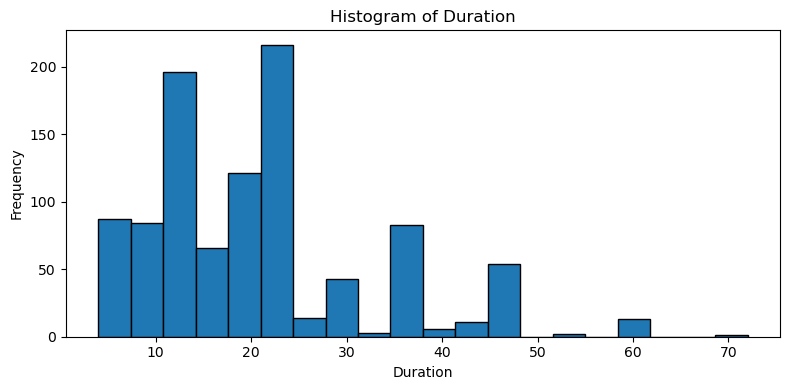

In [19]:
# Select numeric columns to plot histograms
numeric_columns = ['Age', 'Credit amount', 'Duration']

# Plot histograms for each numeric column with different colors
for i, column in enumerate(numeric_columns):
    plt.figure(figsize=(8, 4))
    plt.hist(german_df[column], bins=20,  edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

#### To observe skewness in the data

In [20]:
# Calculate skewness for each numeric column
skewness = german_df[numeric_columns].skew()

In [21]:
# Print the skewness values
print("Skewness for each numeric column:")
print(skewness)

Skewness for each numeric column:
Age              1.020739
Credit amount    1.949628
Duration         1.094184
dtype: float64


#### Applying log transformation for skewed data.

In [22]:
# Select columns with positive skewness for log transformation
columns_to_transform = ['Age', 'Credit amount', 'Duration']

In [23]:
# Apply log transformation to positive values
for col in numeric_columns:
    if german_df[col].min() > 0:  # Ensure only positive values are transformed
        german_df[col] = german_df[col].apply(lambda x: np.log(x))

In [24]:
# Display the first few rows of the transformed DataFrame
print(german_df.head())

        Age     Sex  Job Housing Saving accounts Checking account  \
0  4.204693    male    2     own            none           little   
1  3.091042  female    2     own          little         moderate   
2  3.891820    male    1     own          little             none   
3  3.806662    male    2    free          little           little   
4  3.970292    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0       7.063904  1.791759             radio/TV  good  
1       8.691315  3.871201             radio/TV   bad  
2       7.647786  2.484907            education  good  
3       8.972337  3.737670  furniture/equipment  good  
4       8.490849  3.178054                  car   bad  


#### Check the histograms again to see if data has been normalized.

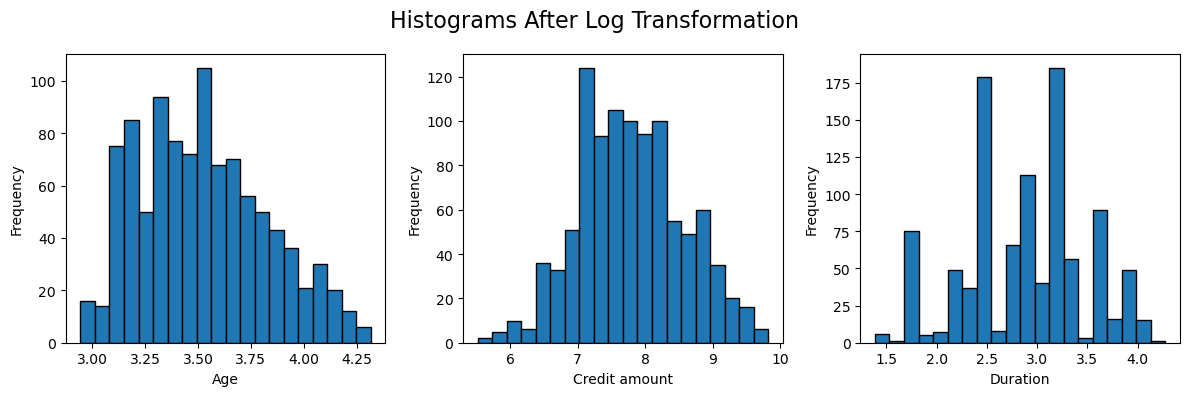

In [25]:
# Plot histograms after log transformation
plt.figure(figsize=(12, 4))
plt.suptitle("Histograms After Log Transformation", fontsize=16)
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    plt.hist(german_df[col], bins=20, edgecolor='k')
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Applying Feature Scaling

In [26]:
# Select the numeric columns for scaling
numeric_columns = ['Age', 'Credit amount', 'Duration']

In [27]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the selected columns
german_df[numeric_columns] = scaler.fit_transform(german_df[numeric_columns])

In [28]:
# Display the first few rows of the scaled dataset
print(german_df.head())

        Age     Sex  Job Housing Saving accounts Checking account  \
0  0.917850    male    2     own            none           little   
1  0.106772  female    2     own          little         moderate   
2  0.689984    male    1     own          little             none   
3  0.627963    male    2    free          little           little   
4  0.747135    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0       0.358712  0.140281             radio/TV  good  
1       0.737184  0.859719             radio/TV   bad  
2       0.494500  0.380094            education  good  
3       0.802539  0.813520  furniture/equipment  good  
4       0.690564  0.619906                  car   bad  


### Choose only the numerical features for clustering and visualize it using PCA

In [29]:
# Select numerical features for clustering
numeric_columns = ['Age', 'Credit amount', 'Duration']
df_numeric = german_df[numeric_columns]


In [30]:
# Standardize the numerical features for clustering
scaler = StandardScaler()
data_numerical_scaled = scaler.fit_transform(df_numeric)

In [31]:
# Choose the number of clusters (example: 3 clusters)
num_clusters = 5

In [32]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
german_df['Cluster'] = kmeans.fit_predict(data_numerical_scaled)

In [33]:
# Check the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_columns)
print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
        Age  Credit amount  Duration
0  0.239659       0.368890  0.319114
1  0.302737       0.526947  0.567903
2  0.324726       0.768711  0.764451
3  0.641299       0.390008  0.335873
4  0.674606       0.658361  0.645452


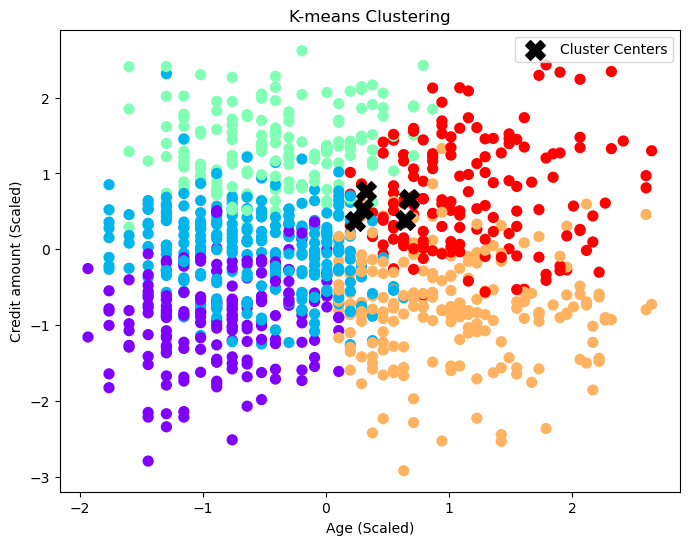

In [34]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_numerical_scaled[:, 0], data_numerical_scaled[:, 1], c=german_df['Cluster'], cmap='rainbow', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Age (Scaled)')
plt.ylabel('Credit amount (Scaled)')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [35]:
# Select numerical features for clustering
features_for_clustering = german_df[['Age', 'Credit amount', 'Duration']]
max_clusters = 10

In [36]:
inertia = []
max_clusters = 10  
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_numerical_scaled)
    inertia.append(kmeans.inertia_)

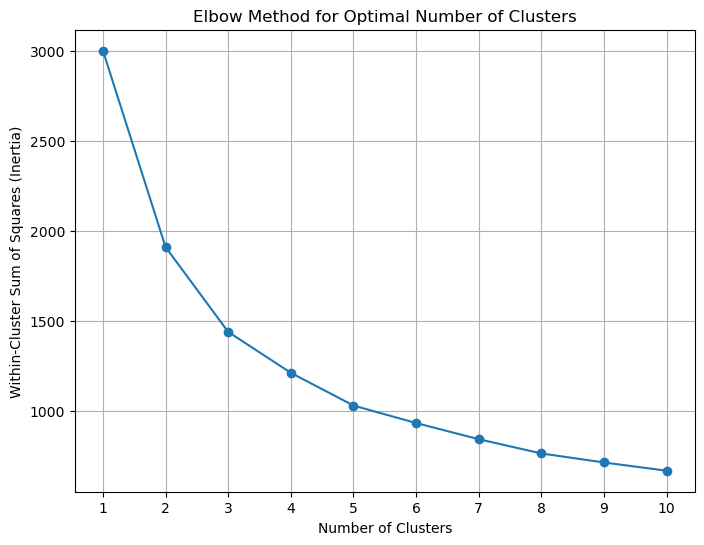

In [37]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [38]:
# Choose the optimal number of clusters based on the elbow point 
optimal_num_clusters = 3

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
german_df['Cluster'] = kmeans.fit_predict(data_numerical_scaled)

In [39]:
# Reduce dimensionality using PCA 
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_numerical_scaled)

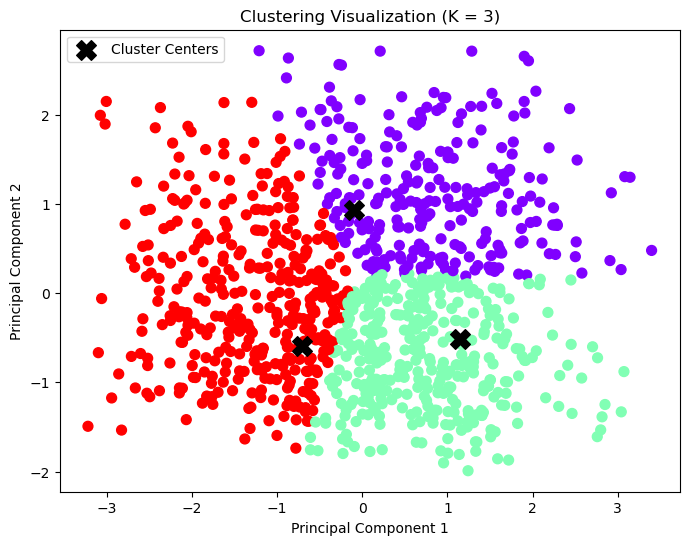

In [40]:
# Plot the clusters using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=german_df['Cluster'], cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Clustering Visualization (K = {optimal_num_clusters})')
plt.legend()
plt.show()

### Implement KFOLD CV and use any classifier of your choosing and report the evaluation metrics

In [41]:
# Select the features for clustering (numeric columns)
features_for_clustering = german_df[['Age', 'Credit amount', 'Duration']]

In [42]:
# Define the number of clusters for k-means
n_clusters = 3

# Initialize K-Fold Cross-Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
# Lists to store evaluation metric scores
silhouette_scores = []
ari_scores = []

for train_index, test_index in k_fold.split(features_for_clustering):
    # Split the data into training and testing sets
    X_train, X_test = features_for_clustering.iloc[train_index], features_for_clustering.iloc[test_index]

    # Fit the k-means clustering model to the training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_train = kmeans.fit_predict(X_train)

In [44]:
# Apply PCA for visualization (Optional)
pca = PCA(n_components=2)
pca_result_train = pca.fit_transform(X_train)


In [45]:
# Calculate the Silhouette Score for the training data
silhouette_scores.append(silhouette_score(X_train, cluster_labels_train))

In [46]:
 # Calculate the Adjusted Rand Index (ARI) for the training data (ground truth is not required for unsupervised learning)
ari_scores.append(adjusted_rand_score(cluster_labels_train, cluster_labels_train))

# Calculate the average Silhouette Score and ARI across all folds
avg_silhouette_score = np.mean(silhouette_scores)
avg_ari_score = np.mean(ari_scores)

# Print the evaluation metrics
print(f"Average Silhouette Score: {avg_silhouette_score}")
print(f"Average Adjusted Rand Index (ARI): {avg_ari_score}")

Average Silhouette Score: 0.3091052007045465
Average Adjusted Rand Index (ARI): 1.0


## Another evaluation metrics

In [47]:
# Select the features and target variable
X = german_df[['Age', 'Credit amount', 'Duration']]
y = german_df['Risk']

In [48]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [50]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
# Initialize KFold with 5 folds
k_f = KFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
# Perform KFold Cross-Validation
for train_index, test_index in k_f.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [53]:
# Train the KNN classifier
knn.fit(X_train, y_train)
    
    # Make predictions
y_pred = knn.predict(X_test)

In [54]:
 # Calculate evaluation metrics for each fold
accuracy_scores.append(accuracy_score(y_test, y_pred))
precision_scores.append(precision_score(y_test, y_pred, pos_label='good'))
recall_scores.append(recall_score(y_test, y_pred, pos_label='good'))
f1_scores.append(f1_score(y_test, y_pred, pos_label='good'))

In [55]:
# Calculate the mean of evaluation metrics across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)

In [56]:
# Print the evaluation metrics
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-score: {mean_f1:.4f}")

Mean Accuracy: 0.6900
Mean Precision: 0.7407
Mean Recall: 0.8571
Mean F1-score: 0.7947
